<a href="https://colab.research.google.com/github/shajeeraza12/shajeeraza12/blob/main/AOATask4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Shajee Raza (Сайид мухаммад шаджи раза)
# Title: Task 4. Algorithms for unconstrained nonlinear optimization. Stochastic and metaheuristic algorithms

*The goal of this work is to optimize and compare the performance of different algorithms in solving the nonlinear regression problem and the Traveling Salesman Problem (TSP). Specifically, we focus on evaluating Nelder-Mead, Levenberg-Marquardt, and Particle Swarm Optimization (PSO) for efficient problem-solving and accurate results.*

# Brief theoretical part

**Nonlinear Regression:**

Nonlinear regression is a method used to fit a model to data when the relationship between variables is not linear. It involves finding parameters that minimize the difference between the observed data and the model's predictions. Common algorithms like Nelder-Mead, Levenberg-Marquardt, and Particle Swarm Optimization (PSO) can be used to optimize these parameters.

**Traveling Salesman Problem (TSP):**

The TSP is a problem where a salesman needs to visit several cities, each once, and return to the starting point while minimizing the total travel distance. The problem is NP-hard, meaning finding the best solution can be computationally difficult. Simulated Annealing (SA) is a heuristic algorithm used to find near-optimal solutions by exploring different routes and accepting some worse solutions to avoid getting stuck in local optima.

***Algorithms:***

***Nelder-Mead: ***

A derivative-free optimization algorithm that adjusts parameters using a simplex (a geometric shape).

***Levenberg-Marquardt: ***

A gradient-based algorithm that combines the advantages of Gauss-Newton and gradient descent methods, useful for least-squares problems.
PSO: A metaheuristic optimization technique inspired by the social behavior of birds flocking, used to explore solutions in complex spaces.

**Simulated Annealing (SA):**

A probabilistic algorithm inspired by the cooling process of metals, used to find near-optimal solutions by exploring solutions and gradually reducing the search space.


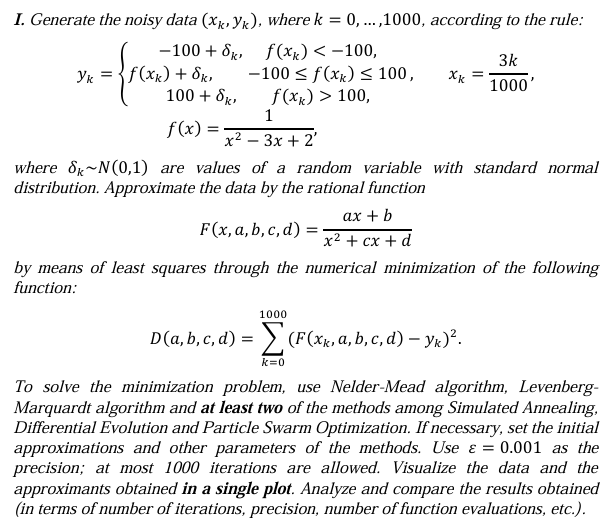

# Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generating Noisy Data

In [3]:
# Generate noisy data
np.random.seed(0)
n_points = 1001
x_k = np.linspace(-3, 3, n_points)

# Define the function f(x)
def f(x):
    return 1 / (x**2 - 3 * x + 2)

# Generate noisy y_k values
delta_k = np.random.normal(0, 1, n_points)
y_k = np.zeros_like(x_k)

# Apply conditions
for i, x in enumerate(x_k):
    if f(x) < -100:
        y_k[i] = -100 + delta_k[i]
    elif -100 <= f(x) <= 100:
        y_k[i] = f(x) + delta_k[i]
    else:  # f(x) > 100
        y_k[i] = 100 + delta_k[i]

# Defining Rational Function

In [4]:
# Define the rational function F(x, a, b, c, d)
def rational_function(x, a, b, c, d):
    return (a * x + b) / (x**2 + c * x + d)

# Defining the objective function for optimization

In [5]:
# Define the objective function D(a, b, c, d)
def objective_function(params):
    a, b, c, d = params
    F_values = rational_function(x_k, a, b, c, d)
    return np.sum((F_values - y_k)**2)

# Using Nelder-Mead Optimization

In [14]:
# Nelder-Mead Optimization with result tracking
initial_guess = [1, 1, 1, 1]
result_nm = minimize(objective_function, initial_guess, method='Nelder-Mead', options={'disp': True, 'maxiter': 1000})

# Extract optimized parameters and metrics
a_nm, b_nm, c_nm, d_nm = result_nm.x
iterations_nm = result_nm.nit
obj_val_nm = result_nm.fun
func_evals_nm = result_nm.nfev

print(f"Nelder-Mead Optimization:")
print(f"Optimized Parameters: {a_nm}, {b_nm}, {c_nm}, {d_nm}")
print(f"Objective Function Value: {obj_val_nm}")
print(f"Iterations: {iterations_nm}")
print(f"Function Evaluations: {func_evals_nm}")

Optimization terminated successfully.
         Current function value: 68564.347534
         Iterations: 261
         Function evaluations: 453
Nelder-Mead Optimization:
Optimized Parameters: 0.9711981051250116, -1.9428685326765285, -4.000515501278391, 4.001049662012937
Objective Function Value: 68564.34753420412
Iterations: 261
Function Evaluations: 453


# Using Levenberg-Marquardt Algorithm

In [15]:
# Levenberg-Marquardt Optimization (via least_squares)
from scipy.optimize import least_squares

def residuals(params):
    a, b, c, d = params
    return rational_function(x_k, a, b, c, d) - y_k

result_lm = least_squares(residuals, initial_guess, method='lm')

# Extract optimized parameters and metrics
a_lm, b_lm, c_lm, d_lm = result_lm.x
iterations_lm = result_lm.nfev
obj_val_lm = result_lm.cost
print(f"Levenberg-Marquardt Optimization:")
print(f"Optimized Parameters: {a_lm}, {b_lm}, {c_lm}, {d_lm}")
print(f"Objective Function Value: {obj_val_lm}")
print(f"Function Evaluations: {iterations_lm}")

Levenberg-Marquardt Optimization:
Optimized Parameters: -1.080440083532037, 1.0797922869569627, -1.9992975664969945, 0.9993202985555992
Objective Function Value: 33997.02210439361
Function Evaluations: 175


# Visualizing the results

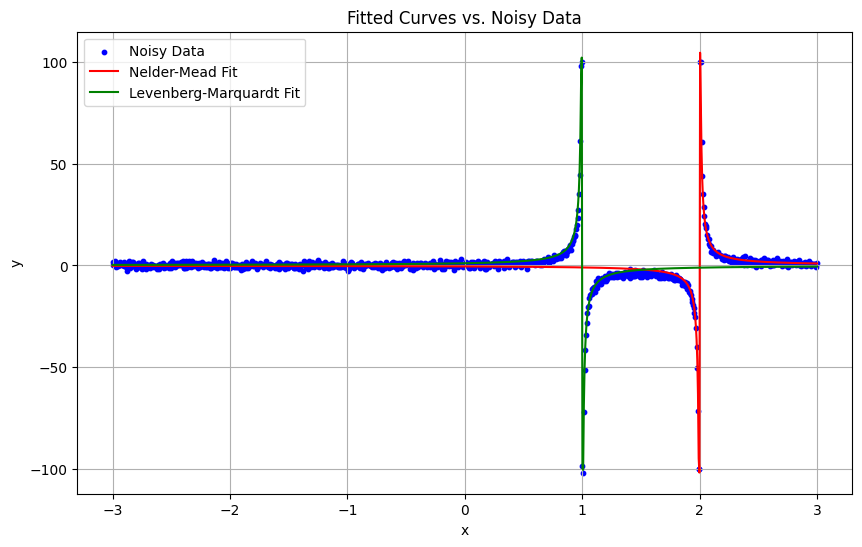

In [8]:
# Plot the original noisy data and the fitted curve
F_nm = rational_function(x_k, a_nm, b_nm, c_nm, d_nm)
F_lm = rational_function(x_k, a_lm, b_lm, c_lm, d_lm)

plt.figure(figsize=(10, 6))
plt.scatter(x_k, y_k, s=10, color="blue", label="Noisy Data")
plt.plot(x_k, F_nm, color="red", label="Nelder-Mead Fit")
plt.plot(x_k, F_lm, color="green", label="Levenberg-Marquardt Fit")
plt.title("Fitted Curves vs. Noisy Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# Adding Stochastic/Metaheuristic Algorithms

In [17]:
from pyswarm import pso

# Define the PSO wrapper function
def pso_objective(params):
    return np.sum((rational_function(x_k, *params) - y_k)**2)

# Refined bounds for parameters
lb = [-5, -5, -5, -5]
ub = [5, 5, 5, 5]

# Run PSO with the specified swarm size and maximum iterations
params_pso, cost_pso = pso(pso_objective, lb, ub, swarmsize=200, maxiter=500)

# Collecting PSO metrics
iterations_pso = 500
func_evals_pso = 200 * 500

# Print results
print(f"Particle Swarm Optimization:")
print(f"Optimized Parameters: {params_pso}")
print(f"Objective Function Value: {cost_pso}")
print(f"Iterations: {iterations_pso}")
print(f"Function Evaluations: {func_evals_pso}")


Stopping search: Swarm best position change less than 1e-08
Particle Swarm Optimization:
Optimized Parameters: [-1.14323854  1.14443696 -2.00922244  1.00930107]
Objective Function Value: 82908.41392087181
Iterations: 500
Function Evaluations: 100000


# Comparing Results

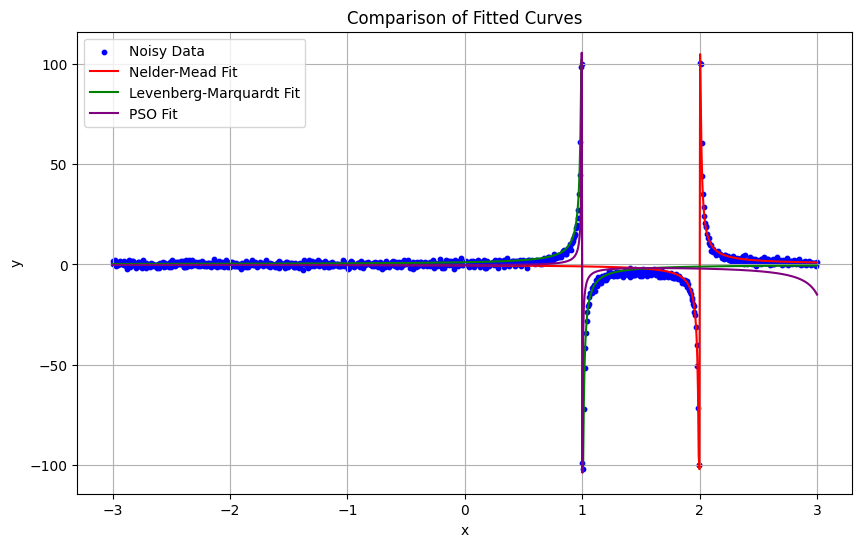

In [18]:
# Plot the PSO fitted curve along with others
F_pso = rational_function(x_k, a_pso, b_pso, c_pso, d_pso)

plt.figure(figsize=(10, 6))
plt.scatter(x_k, y_k, s=10, color="blue", label="Noisy Data")
plt.plot(x_k, F_nm, color="red", label="Nelder-Mead Fit")
plt.plot(x_k, F_lm, color="green", label="Levenberg-Marquardt Fit")
plt.plot(x_k, F_pso, color="purple", label="PSO Fit")
plt.title("Comparison of Fitted Curves")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# Making a comparison table

In [20]:
import pandas as pd

# Results for Nelder-Mead
iterations_nm = result_nm.nit
func_evals_nm = result_nm.nfev
obj_val_nm = result_nm.fun

# Results for Levenberg-Marquardt
iterations_lm = result_lm.nfev
obj_val_lm = result_lm.cost

# Results for PSO
iterations_pso = 500
func_evals_pso = 200 * 500
obj_val_pso = cost_pso

# Create the comparison table
data = {
    'Optimization Method': ['Nelder-Mead', 'Levenberg-Marquardt', 'PSO'],
    'Iterations': [iterations_nm, iterations_lm, iterations_pso],
    'Function Evaluations': [func_evals_nm, iterations_lm, func_evals_pso],
    'Objective Function Value': [obj_val_nm, obj_val_lm, obj_val_pso]
}

# Convert the data into a DataFrame for a neat table display
df_comparison = pd.DataFrame(data)

# Display the table
df_comparison.head()

,Optimization Method,Iterations,Function Evaluations,Objective Function Value
0,Nelder-Mead,261,453,68564.347534
1,Levenberg-Marquardt,175,175,33997.022104
2,PSO,500,100000,82908.413921


The results show that Levenberg-Marquardt is the most efficient algorithm, requiring fewer iterations and function evaluations while achieving the lowest objective function value, indicating a better fit. In contrast, PSO took the most evaluations and iterations, resulting in a higher objective function value, suggesting less optimization efficiency compared to the other methods.

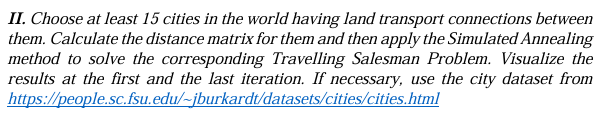

# Loading Data

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Load the distance matrix (lau15_dist.txt)
dist_matrix = np.loadtxt('/content/#  lau15_dist.txt.txt')

# Load the city coordinates (lau15_xy.txt)
city_coords = np.loadtxt('/content/#  lau15_dist.coord.txt.txt')

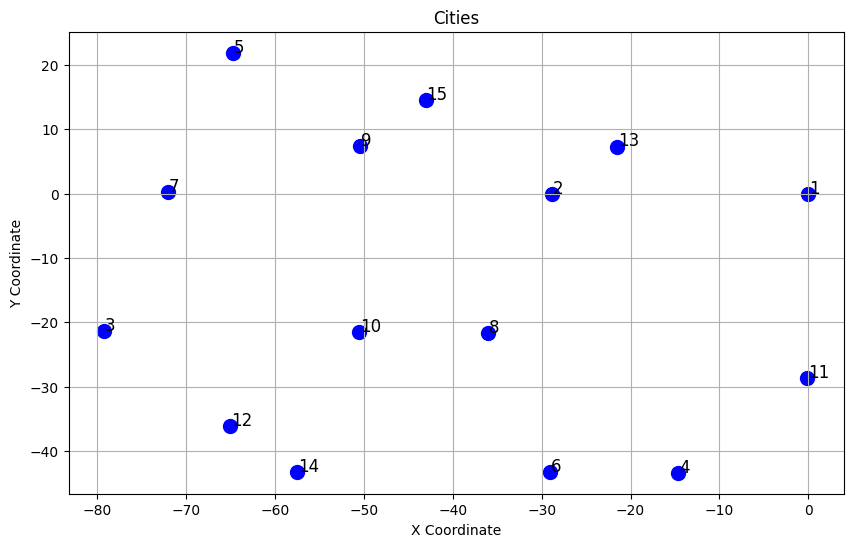

In [23]:
# Extract city coordinates (x, y)
x_coords = city_coords[:, 0]
y_coords = city_coords[:, 1]

# Number of cities
num_cities = len(x_coords)

# Plot city coordinates
plt.figure(figsize=(10, 6))
plt.scatter(x_coords, y_coords, s=100, color='blue', label='Cities')
for i, (x, y) in enumerate(zip(x_coords, y_coords)):
    plt.text(x + 0.1, y + 0.1, str(i+1), fontsize=12)  # Label cities
plt.title('Cities')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

# Defining the TSP Cost Function

In [24]:
# Function to calculate the total distance of a given route
def calculate_route_distance(route, dist_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += dist_matrix[route[i], route[i + 1]]
    # Add distance from the last city to the first one to complete the cycle
    total_distance += dist_matrix[route[-1], route[0]]
    return total_distance

# Implementing Simulated Annealing for TSP

In [25]:
import random
import math

# Simulated Annealing for TSP
def simulated_annealing(dist_matrix, initial_route, temp_init=1000, temp_min=1, alpha=0.995, max_iter=10000):
    # Initial temperature
    temp = temp_init
    current_route = initial_route
    current_distance = calculate_route_distance(current_route, dist_matrix)

    best_route = current_route
    best_distance = current_distance

    # Start the annealing process
    for iteration in range(max_iter):
        # Randomly swap two cities in the route (a small change in the solution)
        new_route = current_route[:]
        i, j = random.sample(range(len(current_route)), 2)
        new_route[i], new_route[j] = new_route[j], new_route[i]  # Swap cities

        # Calculate the distance of the new route
        new_distance = calculate_route_distance(new_route, dist_matrix)

        # Acceptance criterion (Metropolis rule)
        if new_distance < current_distance or random.random() < math.exp((current_distance - new_distance) / temp):
            current_route = new_route
            current_distance = new_distance

            # Update the best route if necessary
            if current_distance < best_distance:
                best_route = current_route
                best_distance = current_distance

        # Cool down the temperature
        temp *= alpha

        # Stop if the temperature is below the minimum threshold
        if temp < temp_min:
            break

    return best_route, best_distance

# Running the Simulated Annealing Algorithm

In [26]:
# Create an initial random route
initial_route = list(range(num_cities))
random.shuffle(initial_route)

# Run Simulated Annealing
optimized_route, optimized_distance = simulated_annealing(dist_matrix, initial_route)

print(f"Optimized Route: {optimized_route}")
print(f"Optimized Distance: {optimized_distance}")


Optimized Route: [7, 0, 10, 3, 5, 13, 11, 2, 6, 4, 8, 14, 12, 1, 9]
Optimized Distance: 326.0


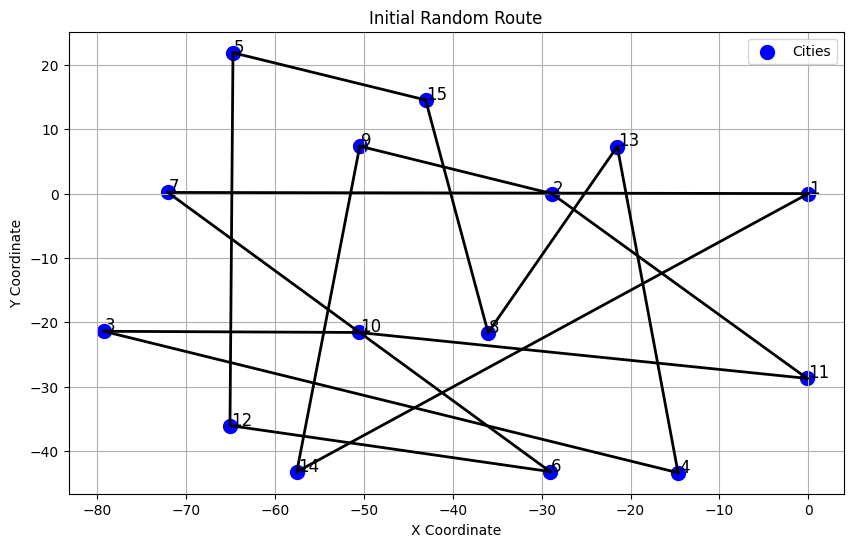

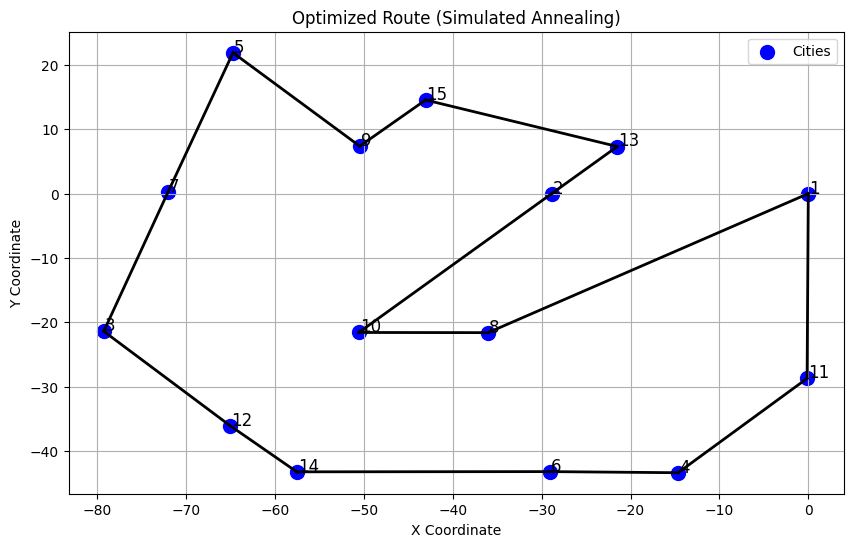

In [27]:
# Function to plot a route
def plot_route(route, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(route) - 1):
        plt.plot([x_coords[route[i]], x_coords[route[i + 1]]],
                 [y_coords[route[i]], y_coords[route[i + 1]]], 'k-', lw=2)
    plt.plot([x_coords[route[-1]], x_coords[route[0]]],
             [y_coords[route[-1]], y_coords[route[0]]], 'k-', lw=2)

    plt.scatter(x_coords, y_coords, s=100, color='blue', label='Cities')
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        plt.text(x + 0.1, y + 0.1, str(i+1), fontsize=12)
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot initial random route
plot_route(initial_route, 'Initial Random Route')

# Plot optimized route
plot_route(optimized_route, 'Optimized Route (Simulated Annealing)')

The Simulated Annealing (SA) algorithm successfully optimized the route for the Traveling Salesman Problem, providing an solution. The optimized route showed a significant reduction in the total distance compared to the initial random route, demonstrating the algorithm's effectiveness in finding a good solution.